## Importando as bibliotecas

In [1]:
import os

import numpy as np
from skimage import measure, util, color, morphology, filters, transform
from skimage.io import imread, imshow
# from PIL import Image

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Remove abreviação do print
np.set_printoptions(threshold=np.inf)

## Carregando as imagens do dataset

In [35]:
def resize_with_padding(image):
    height, width = image.shape
    
    if width >= height:
        new_height = 256/width * height
        padding = int((256-new_height)//2)
        image_resized = transform.resize(image, (new_height, 256), anti_aliasing=True)
        image_resized = np.pad(image_resized, pad_width=( (padding, padding), (0, 0)) )
    else:
        new_width = 256/height * width
        padding = int((256-new_width)//2)
        image_resized = transform.resize(image, (256, new_width), anti_aliasing=True)
        image_resized = np.pad(image_resized, pad_width=((0, 0), (padding, padding)) )
        
    return image_resized

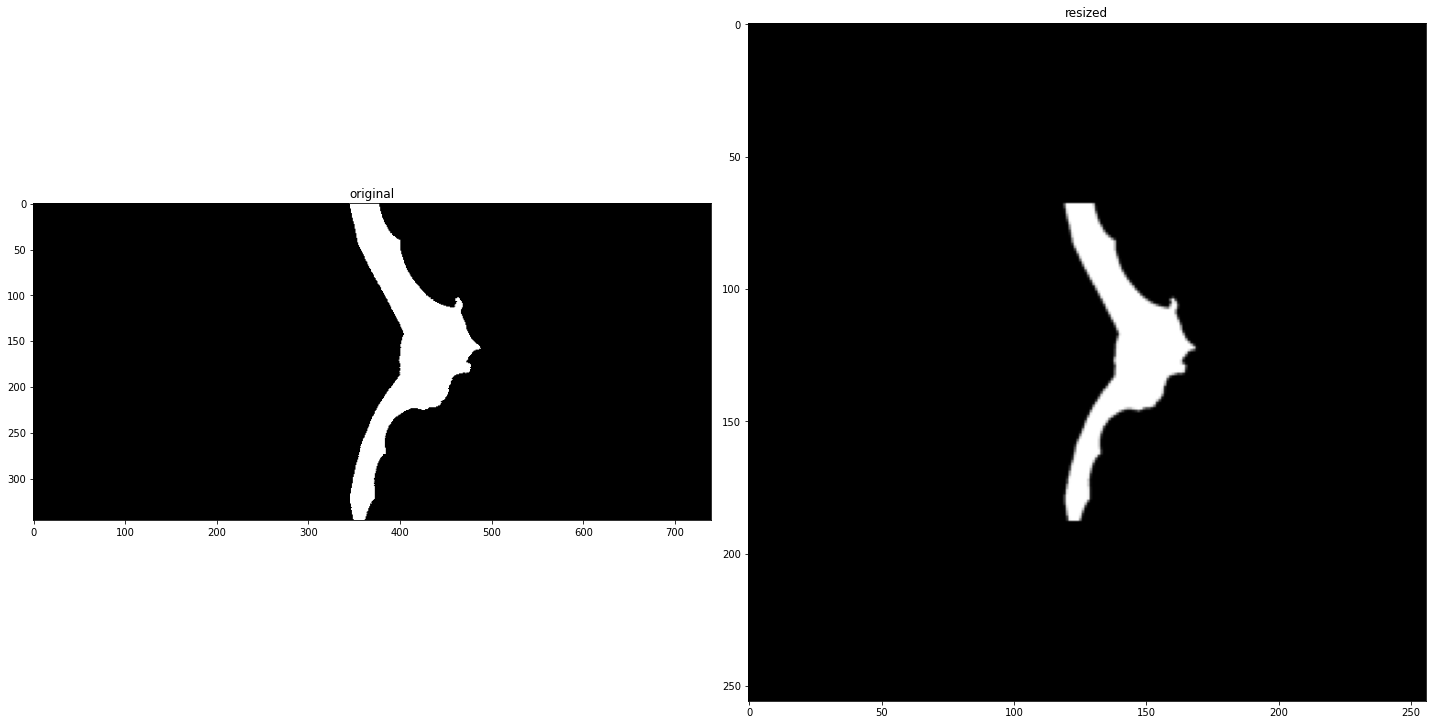

In [34]:
ds_path = 'data/train'
img_temp = imread(os.path.join(ds_path, "bat", "bat-19_3.gif"), as_gray=True)
    
img_resized = resize_with_padding(img_temp)

# img_temp = np.pad(img_temp, pad_width=1)
# print(img_temp.shape)
# img_float = util.img_as_float(img_temp_gray)
# print(img_float)
# imshow(img_temp)
# imshow(img_resized)

fig, ax  = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(img_temp, cmap='gray')
ax[0].set_title("original")

ax[1].imshow(img_resized, cmap='gray')
ax[1].set_title("resized")

fig.tight_layout()
plt.show()

In [3]:
ds_path = 'data/train'

# Lista das pastas na pasta 'ds_path' (classes)
classes_list = os.listdir(ds_path)

# Lista com as imagens no dataset
image_list = []

# Lista com os rótulos das imagens
label_list = []

# Lista com os nomes das imagens
filename_list_ = []

# Percorre as classes do dataset
for classe in classes_list:
    # Listagem de todas as imagens na pasta daquela classe
    filename_list = os.listdir(os.path.join(ds_path, classe))
    
    # Percorre os arquivos na pasta atual
    for filename in filename_list:
        # Carrega a imagem
        img_temp = imread(os.path.join(ds_path, classe, filename), as_gray=True)
        
        # Resize
        img_temp = transform.resize(img_temp, (256, 256/img_temp.shape[0] * img_temp.shape[1]))
        
        # Padding
        img_temp = np.pad(img_temp, pad_width=1)

        # Adiciona a imagem a lista de imagens
        image_list.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_.append(filename)

In [4]:
# Lista com os rótulos das imagens        
print(label_list)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 

## Convertendo os nomes das classes para índices numéricos

In [5]:
# Indices das classes dos objetos do dataset
_, _, label_list_idx = np.unique(label_list, return_index=True, return_inverse=True)

print(type(label_list_idx))
print(label_list_idx)

### label_list_idx = np.array(label_list_idx)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 

## Plotando as imagens do conjunto de dados

In [6]:
# Seleciona apenas as primeiras N imagens de cada classe
image_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(4):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    image_list_temp += [image_list[j] for j in np.where(label_list_idx==i)[0][:6]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list_idx==i)[0][:6]]

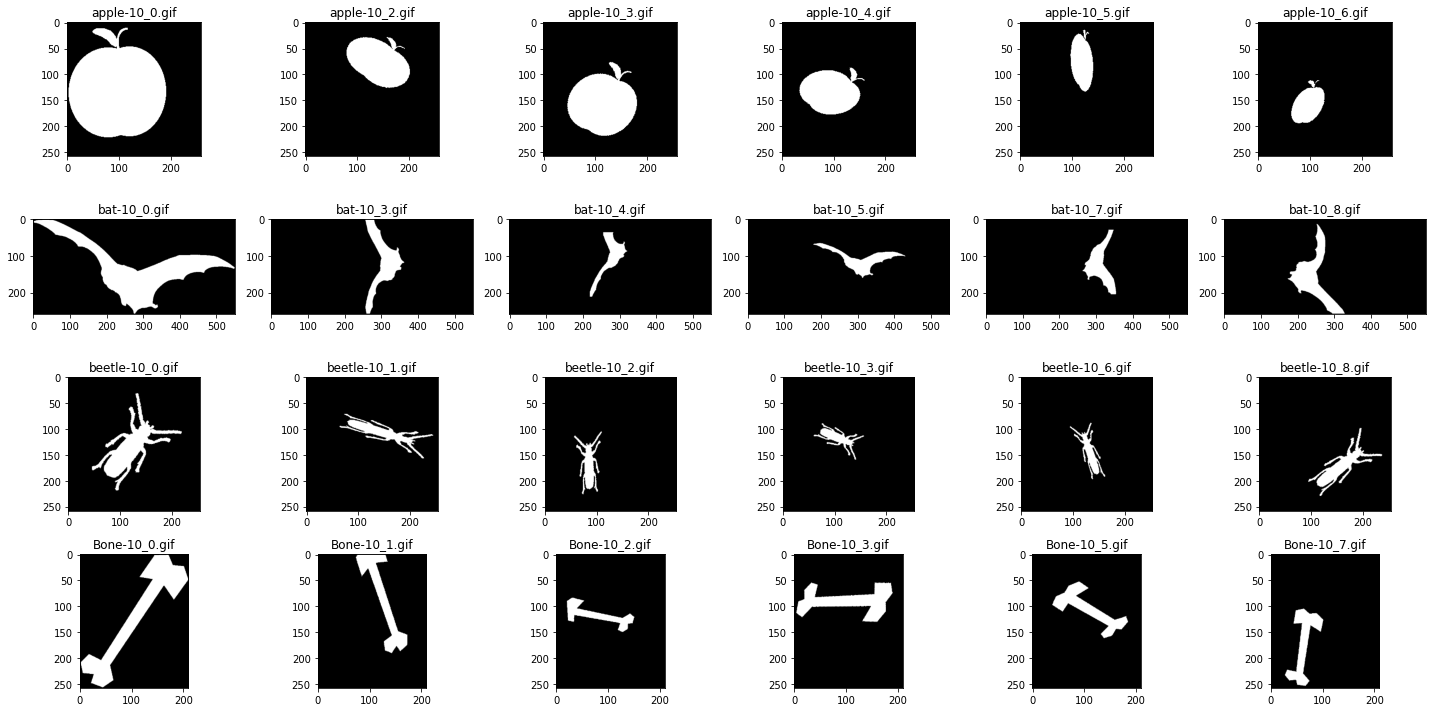

In [16]:
fig, ax  = plt.subplots(4, 6, figsize=(20, 10))

for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap='gray')
    ax[i//6, i%6].set_title(str(filename))

fig.tight_layout()
plt.show()

## Extraindo as características das imagens

In [8]:
# Nomes das caracteristicas computadas
features = ['area', 'major_axis', 'minor_axis', 'solidity', 'eccentricity']

# Arranjo 2D com as caracteristicas das imagens
#   Cada linha armazena informações sobre uma imagem. Cada coluna armazena uma caracteristica.
#   [ [area, major_axis, minor_axis, solidity, eccentricity] ]
feature_mat = []

# Lista com as imagens segmentadas (binárias)
seg_list = []

# Lista com os rótulos das imagens
list_label = []

for i, (image, label) in enumerate(zip(image_list, label_list)):
    # DEBUG
    # print('Imagem {} - classe {}'.format(i, label))
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label.append(label)
    
    # Converte a imagem para float
    img_float = util.img_as_float(image)
    
    # Segmentação por limiarização usando Otsu
    img_seg = img_float < filters.threshold_otsu(img_float)
    
    # Remove objetos na imagem com menos de N pixels.
    img_seg = morphology.remove_small_objects(img_seg, 10000)
    
    # Adiciona a imagem segmentada à lista.
    seg_list.append(img_seg)
    
    # Calcula a imagem de rótulos
    im_lbl = measure.label(img_seg)
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    props = measure.regionprops(im_lbl)
    
    if len(props) != 1:
        print(f'ERRO de segmentação: {len(props)}')
        continue

    # Itera pelas propriedades computadas
    for prop in props:
        # Prop. 0: Area
        area = prop.area
       
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length 
        
        # Prop. 3: Solidez
        solidity = prop.solidity 
        
        # Prop. 4: Excentricidade
        eccentricity = prop.eccentricity 

        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [area, major_axis, minor_axis, solidity, eccentricity]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat.append(feature_list)

In [9]:
# Converte a lista de caracteristicas para um arranjo NumPy
feature_map = np.array(feature_mat)

# Imprime a matriz de caracteristica
# with np.printoptions(precision=4, suppress=True):
#     print(feature_map)

[[ 38528.        354.6548    326.5506      0.5788      0.3901]
 [ 58139.        315.0294    304.5891      0.8734      0.2553]
 [ 53864.        325.1881    318.2968      0.8092      0.2048]
 [ 58777.        315.4172    309.2021      0.883       0.1975]
 [ 62878.        306.3396    300.6656      0.9446      0.1916]
 [ 63127.        305.6385    302.3655      0.9484      0.146 ]
 [ 33327.        357.6242    353.4032      0.5007      0.1532]
 [ 49934.        326.024     301.7842      0.7502      0.3784]
 [ 48272.        331.0375    315.6686      0.7252      0.3012]
 [ 56808.        319.6168    308.4815      0.8534      0.2617]
 [ 60763.        311.1371    308.2877      0.9129      0.135 ]
 [ 60929.        310.6692    306.869       0.9153      0.1559]
 [ 32774.        368.3668    340.029       0.4924      0.3846]
 [ 48093.        331.3357    325.6331      0.7225      0.1847]
 [ 47059.        344.2635    314.5256      0.707       0.4066]
 [ 60653.        311.1171    298.2758      0.9112      

In [10]:
# Algumas estatisticas sobre o conjunto de caracteristicas
with np.printoptions(precision=4, suppress=True):
    print(feature_map.min(0))
    print(feature_map.max(0))
    print(feature_map.mean(0))
    print(feature_map.std(0))

[20779.       296.0709   150.1472     0.4345     0.0598]
[144212.        794.4703    360.2094      0.9842      0.9141]
[59292.8175   350.0299   276.6695     0.8749     0.4894]
[22893.2046    98.7499    44.988      0.1045     0.2446]


## Normalizando as caracteristicas

In [11]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map.std(0))

Média:
[59292.8175   350.0299   276.6695     0.8749     0.4894]
Desvio padrão:
[22893.2046    98.7499    44.988      0.1045     0.2446]


In [12]:
# Transformada Normal de Caracteristicas
feature_map_norm = (feature_map - feature_map.mean(0)) / feature_map.std(0)

# print(feature_map_norm)

In [13]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map_norm.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map_norm.std(0))

Média:
[ 0. -0.  0.  0. -0.]
Desvio padrão:
[1. 1. 1. 1. 1.]


### Plotando as caracteristicas computadas normalizadas

In [14]:
df = pd.DataFrame(feature_map_norm, columns=features)

df['class'] = label_list

### print(df)
display(df)

,area,major_axis,minor_axis,solidity,eccentricity,class
0,-0.907030,0.046834,1.108766,-2.832270,-0.405927,apple
1,-0.050400,-0.354436,0.620601,-0.013586,-0.957171,apple
2,-0.237137,-0.251563,0.925298,-0.628031,-1.163766,apple
3,-0.022531,-0.350508,0.723140,0.078114,-1.193377,apple
4,0.156605,-0.442434,0.533390,0.667549,-1.217755,apple
...,...,...,...,...,...,...
499,-0.303707,-0.490387,-0.671367,0.872426,0.355513,bone
500,-0.396485,-0.515214,-0.617162,0.497365,0.266996,bone
501,-0.383425,-0.459752,-0.787375,0.550163,0.495449,bone
502,-0.413346,-0.509670,-0.625168,0.429204,0.283599,bone


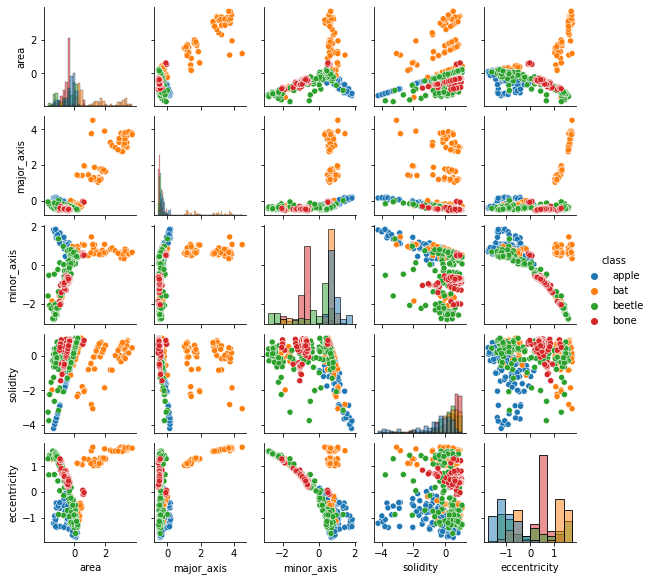

In [15]:
g = sns.PairGrid(df, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()